# Analyse des donnees

## Les imports

In [1839]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import ast            # Pour convertir les chaines de carateres en type Python
import warnings       # Pour eviter de souvent afficher des messages d'erreurs encombrants

## Chargeons les donnees

### Version Colab

In [1840]:
# "to load data from github (update it if we have to)"
# import os
# if not os.path.exists("assets"):
#     print("Data wansn't here. Let's download it!")
#     !git clone https://github.com/desmond-rn/assets.git
# else:
#     print("Data already here. Let's update it!")
#     %cd assets
#     # %rm -rf assets
#     !git pull https://github.com/desmond-rn/assets.git
#     %cd ..

# print("\n")
# !ls assets/dataframes/inverse

# df_spatial_path = "assets/dataframes/inverse/df_spatial.csv"
# df_temporal_path = "assets/dataframes/inverse/df_temporal.csv"

### Version Jupyter

In [1841]:
"to load data locally"

%ls "../../data"

df_spatial_path = "../../data/df_spatial.csv"
df_temporal_path = "../../data/df_temporal.csv"

Volume in drive C has no label.
 Volume Serial Number is 2248-85E1

 Directory of c:\Users\Roussel\Dropbox\Unistra\SEMESTRE 2\Projet\Inverse\moco-inverse\data

16/05/2020  19:10    <DIR>          .
16/05/2020  19:10    <DIR>          ..
17/05/2020  10:11            61,341 dataframe_1.csv
17/05/2020  10:11            87,844 dataframe_2.csv
16/05/2020  15:20             1,394 df_1.csv
17/05/2020  12:13             4,404 df_1_test.csv
16/05/2020  15:20             1,484 df_2.csv
17/05/2020  12:13            15,178 df_2_test.csv
17/05/2020  14:01             7,323 df_spatial.csv
17/05/2020  14:01             3,567 df_temporal.csv
               8 File(s)        182,535 bytes
               2 Dir(s)  101,733,240,832 bytes free


**Obectif du projet**
- Analyse des donnees

## I - RETRAITEMENT DES DONNESS

## En espace

In [1842]:
types = {'x_min':float, 'x_max':float, 'N':int, 'c':float, 'a':float, 'C_v':float, 'CFL':float, 'epsilon':float, 't_final':float, 'rho_expr':str, 'sigma_a_expr':str, 'sigma_c_expr':str, 'E_x_0_expr':str, 'F_x_0_expr':str, 'T_x_0_expr':str, 'dt':float, 'time_steps':int, 'x':str, 'rho':str, 'sigma_a':str, 'sigma_c':str, 'E_init':str, 'E_final':str, 'F_init':str, 'F_final':str, 'T_init':str, 'T_final':str}

df_space = pd.read_csv(df_spatial_path, thousands=',', dtype=types)

df_space.head(1)
# df_space.loc[:, ['x','rho']].head(1)

,x_min,x_max,N,c,a,C_v,CFL,epsilon,t_final,rho_expr,...,x,rho,sigma_a,sigma_c,E_init,E_final,F_init,F_final,T_init,T_final
0,0.0,1.0,100,1.0,1.0,1.0,0.99,0.0001,0.5,10,...,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.21674e-22, 3.70353e-21, 2.52616e-20, 1.6555...","[0.519344, 0.492195, 0.450395, 0.398467, 0.341...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.473908, -0.446759, -0.404949, -0.353003, -...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.995456, 0.995503, 0.995548, 0.995588, 0.995..."


In [1843]:
df_space.dtypes

x_min           float64
x_max           float64
N                 int32
c               float64
a               float64
C_v             float64
CFL             float64
epsilon         float64
t_final         float64
rho_expr         object
sigma_a_expr     object
sigma_c_expr     object
E_x_0_expr       object
F_x_0_expr       object
T_x_0_expr       object
dt              float64
time_steps        int32
x                object
rho              object
sigma_a          object
sigma_c          object
E_init           object
E_final          object
F_init           object
F_final          object
T_init           object
T_final          object
dtype: object

In [1844]:
type(df_space.loc[0, 'rho_expr'])

str

## En temps

In [1845]:
types = {'x_min':float, 'x_max':float, 'N':int, 'c':float, 'a':float, 'C_v':float, 'CFL':float, 'epsilon':float, 't_final':float, 'rho_expr':str, 'sigma_a_expr':str, 'sigma_c_expr':str, 'E_x_0_expr':str, 'F_x_0_expr':str, 'T_x_0_expr':str, 'dt':float, 'time_steps':int, 'E_left':str, 'E_right':str, 'F_left':str, 'F_right':str, 'T_left':str, 'T_right':str}
df_time = pd.read_csv(df_temporal_path, thousands=',', dtype=types)

df_time.head(1)

,x_min,x_max,N,c,a,C_v,CFL,epsilon,t_final,rho_expr,...,F_x_0_expr,T_x_0_expr,dt,time_steps,E_left,E_right,F_left,F_right,T_left,T_right
0,0.0,1.0,100,1.0,1.0,1.0,0.99,0.0001,0.5,10,...,0,1,0.0099,51,"[5.21674e-22, 0.00098863, 0.00197589, 0.002961...","[5.21674e-22, 0.00098863, 0.00197589, 0.002961...","[0, 0, 0, 0, 0, -2.57606e-18, -1.71738e-17, -9...","[0, 0, 0, 0, 0, 2.57606e-18, 1.71738e-17, 9.44...","[1, 0.999901, 0.999802, 0.999704, 0.999605, 0....","[1, 0.999901, 0.999802, 0.999704, 0.999605, 0...."


# II - VISUALISATION DES DONNES

## En espace

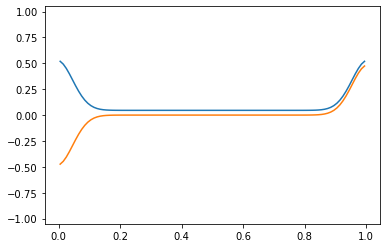

In [1846]:
""" plot pour la premiere ligne"""
# x_expr = df_space.loc[2, 'rho_exp']
# x_expr

index = 0

x = df_space.loc[index, 'x']
type(x)
x = np.array(ast.literal_eval(x))
# print(x)

y1 = df_space.loc[index, 'E_final']
y2 = df_space.loc[index, 'F_final']
# y = df_space.loc[index, 'sigma_c']
# y = df_space.loc[index, 'T_init']
# y = df_space.loc[index, 'T_final']
# y = df_space.loc[index, 'rho']
type(x)
y1 = np.array(ast.literal_eval(y1))
y2 = np.array(ast.literal_eval(y2))
# print(y)

ax = plt.gca()
ax.set_ylim([-1.05, 1.05])
ax.plot(x, y1)
ax.plot(x, y2)

# En temps

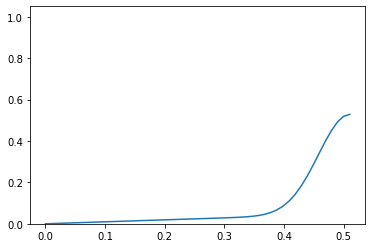

In [1847]:
index = 0

time_steps = df_time.loc[index, 'time_steps']
t_final = df_time.loc[index, 't_final']
dt = df_time.loc[index, 'dt']

t = np.linspace(0, t_final+dt, time_steps)

y = df_time.loc[index, 'E_right']
y = np.array(ast.literal_eval(y))

ax = plt.gca()
ax.set_ylim([0, 1.05])
ax.plot(t, y)